<a href="https://colab.research.google.com/github/SamInMotion/Customer-Churn-analysis/blob/main/BCG_Task_2__EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis Starter

## Import packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)
plt.rcParams['figure.figsize'] = (12, 8)

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [2]:
client_df = pd.read_csv('/content/client_data (1).csv')
price_df = pd.read_csv('/content/price_data (1).csv')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [3]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [4]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [5]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [ ]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [6]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [7]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,66163.000000,66163.000000,66163.000000,66163.000000,66163.000000,66163.000000
mean,0.140770,0.054527,0.031220,43.330628,10.845027,6.557285
std,0.024656,0.050078,0.036463,5.299517,12.866952,7.804339
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125893,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.145749,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151367,0.101864,0.072846,44.444710,24.339581,16.226389
max,0.280700,0.181480,0.114102,59.444710,36.490692,17.458221



# 3. DATA PREPARATION

Before analyzing the data, we need to prepare it by converting date columns,
handling missing values, and creating any additional features needed for analysis.
"""

In [8]:


def prepare_data(client_df, price_df):
    """
    Prepare datasets for analysis by converting dates and creating derived features.
    """
    # Create copies to avoid modifying originals
    client = client_df.copy()
    price = price_df.copy()

    # Convert date columns to datetime
    date_columns = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']
    for col in date_columns:
        if col in client.columns:
            client[col] = pd.to_datetime(client[col], errors='coerce')
            print(f"Converted {col} to datetime")

    if 'price_date' in price.columns:
        price['price_date'] = pd.to_datetime(price['price_date'], errors='coerce')
        print("Converted price_date to datetime")

    # Calculate customer tenure in days
    if 'date_activ' in client.columns and 'date_end' in client.columns:
        client['tenure_days'] = (client['date_end'] - client['date_activ']).dt.days
        print("Created tenure_days feature")

    # Create month and year features from activation date
    if 'date_activ' in client.columns:
        client['activation_year'] = client['date_activ'].dt.year
        client['activation_month'] = client['date_activ'].dt.month
        print("Created activation_year and activation_month features")

    # Create customer segmentation based on consumption
    if 'cons_12m' in client.columns:
        client['usage_category'] = pd.qcut(
            client['cons_12m'],
            q=4,
            labels=['Low', 'Medium', 'High', 'Very High']
        )
        print("Created usage_category segmentation")

    return client, price

# Prepare data for analysis
client_df, price_df = prepare_data(client_df, price_df)


Converted date_activ to datetime
Converted date_end to datetime
Converted date_modif_prod to datetime
Converted date_renewal to datetime
Converted price_date to datetime
Created tenure_days feature
Created activation_year and activation_month features
Created usage_category segmentation




## Data visualization

If you're working in Python, two of the most popular packages for visualization are `matplotlib` and `seaborn`. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!

Below are some functions that you can use to get started with visualizations.
We first examine the overall churn rate to understand the scope of the customer
retention challenge.

In [9]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:

        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

The first function `plot_stacked_bars` is used to plot a stacked bar chart. An example of how you could use this is shown below:

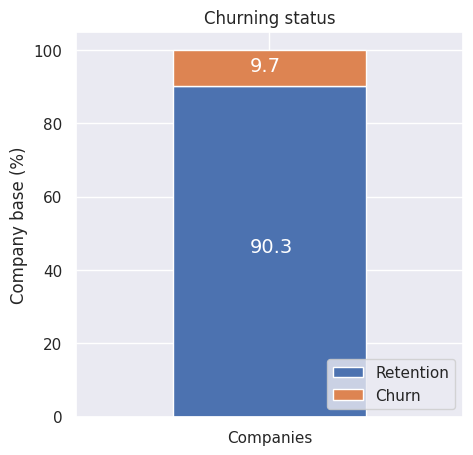

In [ ]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column. An example of how it can be used is given below:

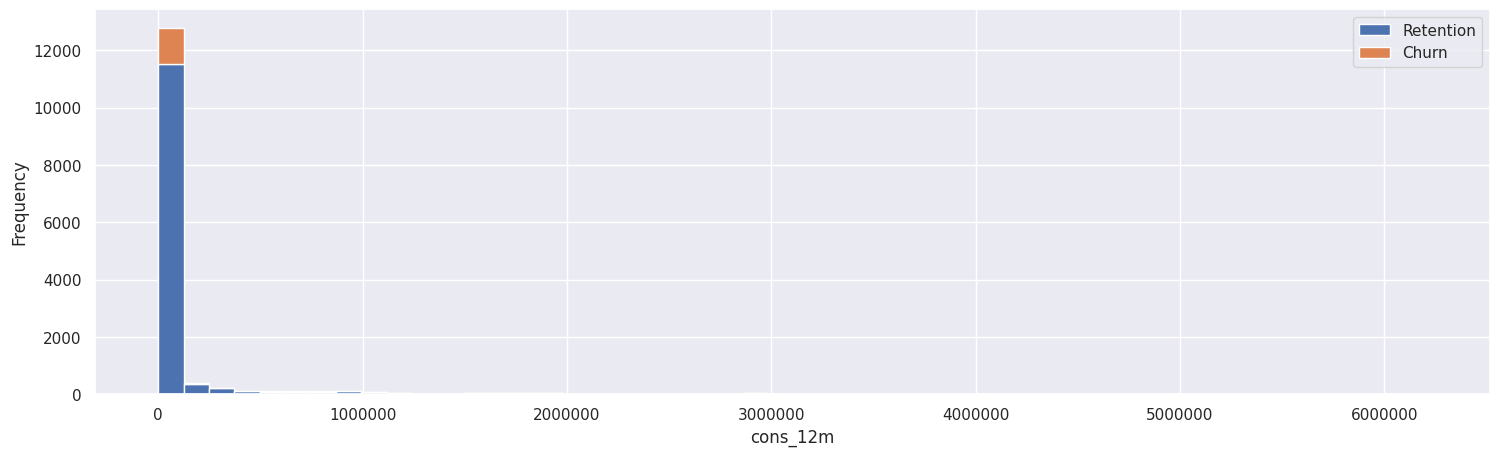

In [ ]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(consumption, 'cons_12m', axs)

# 5. Exploratory Visualizations

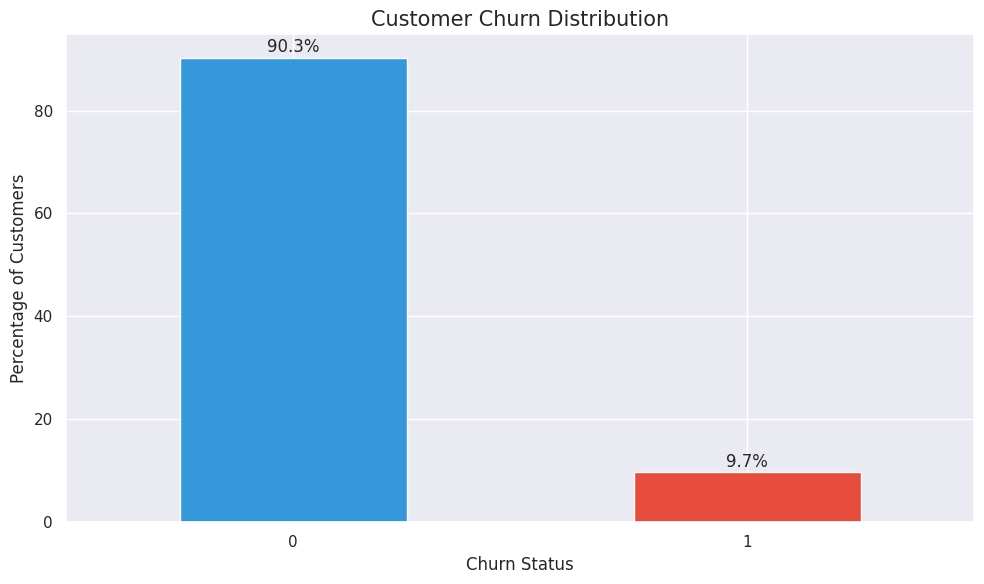

In [ ]:
# 5.1 Churn Distribution
plt.figure(figsize=(10, 6))
churn_counts = client_df['churn'].value_counts(normalize=True) * 100
churn_counts.plot(kind='bar', color=['#3498db', '#e74c3c'])
plt.title('Customer Churn Distribution', fontsize=15)
plt.xlabel('Churn Status', fontsize=12)
plt.ylabel('Percentage of Customers', fontsize=12)
plt.xticks(rotation=0)
for i, v in enumerate(churn_counts):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', fontsize=12)
plt.tight_layout()
plt.show()


<ipython-input-29-03202cac75b9>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_usage = client_df.groupby('usage_category')['churn'].mean() * 100


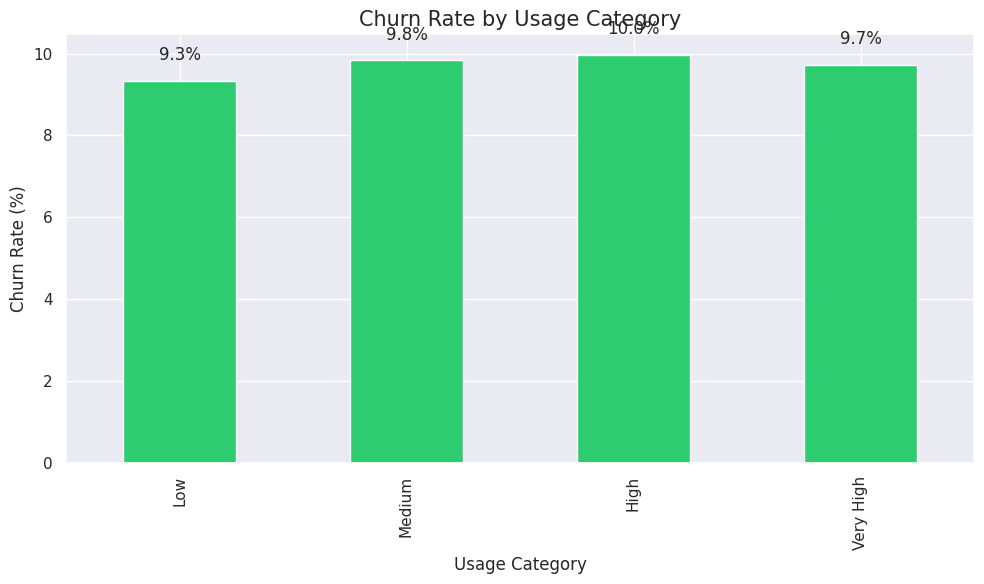

In [ ]:
# 6.1 Customer Segmentation by Usage
# Create usage categories
if 'cons_12m' in client_df.columns:
    client_df['usage_category'] = pd.qcut(
        client_df['cons_12m'],
        q=4,
        labels=['Low', 'Medium', 'High', 'Very High']
    )

    # Churn rate by usage category
    plt.figure(figsize=(10, 6))
    churn_by_usage = client_df.groupby('usage_category')['churn'].mean() * 100
    churn_by_usage.plot(kind='bar', color='#2ecc71')
    plt.title('Churn Rate by Usage Category', fontsize=15)
    plt.xlabel('Usage Category', fontsize=12)
    plt.ylabel('Churn Rate (%)', fontsize=12)
    for i, v in enumerate(churn_by_usage):
        plt.text(i, v + 0.5, f"{v:.1f}%", ha='center', fontsize=12)
    plt.tight_layout()
    plt.show()

#FEATURE CORRELATION ANALYSIS

We examine correlations between various features and churn to identify the
strongest predictors of customer attrition.


=== Feature Correlation Analysis ===


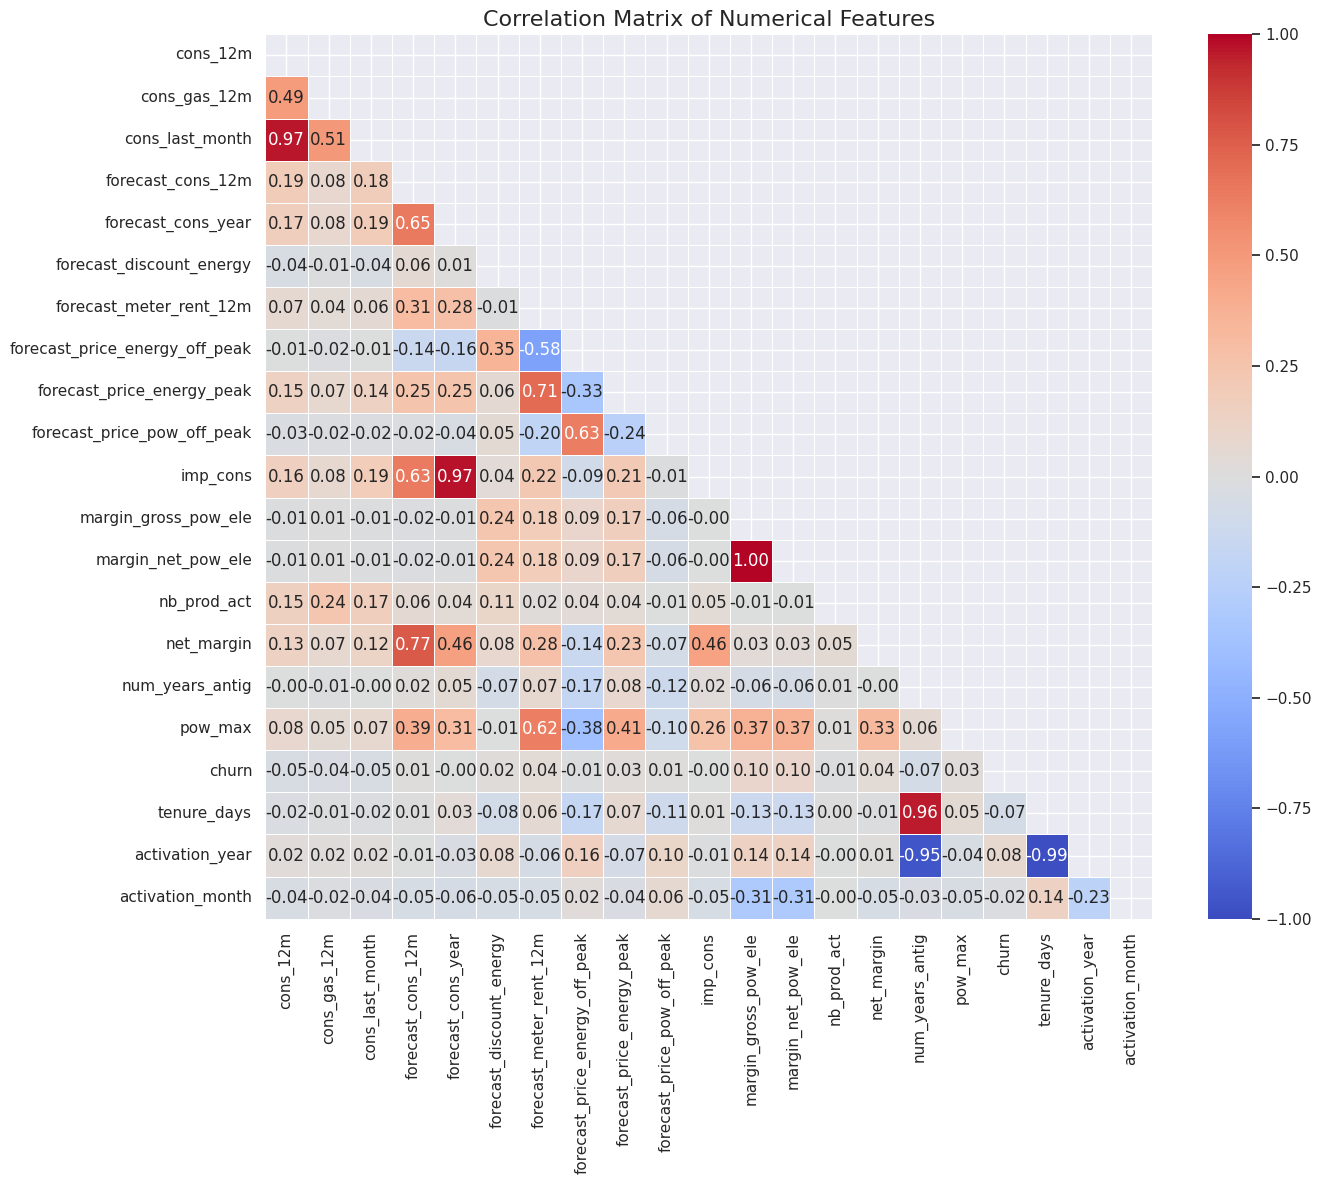

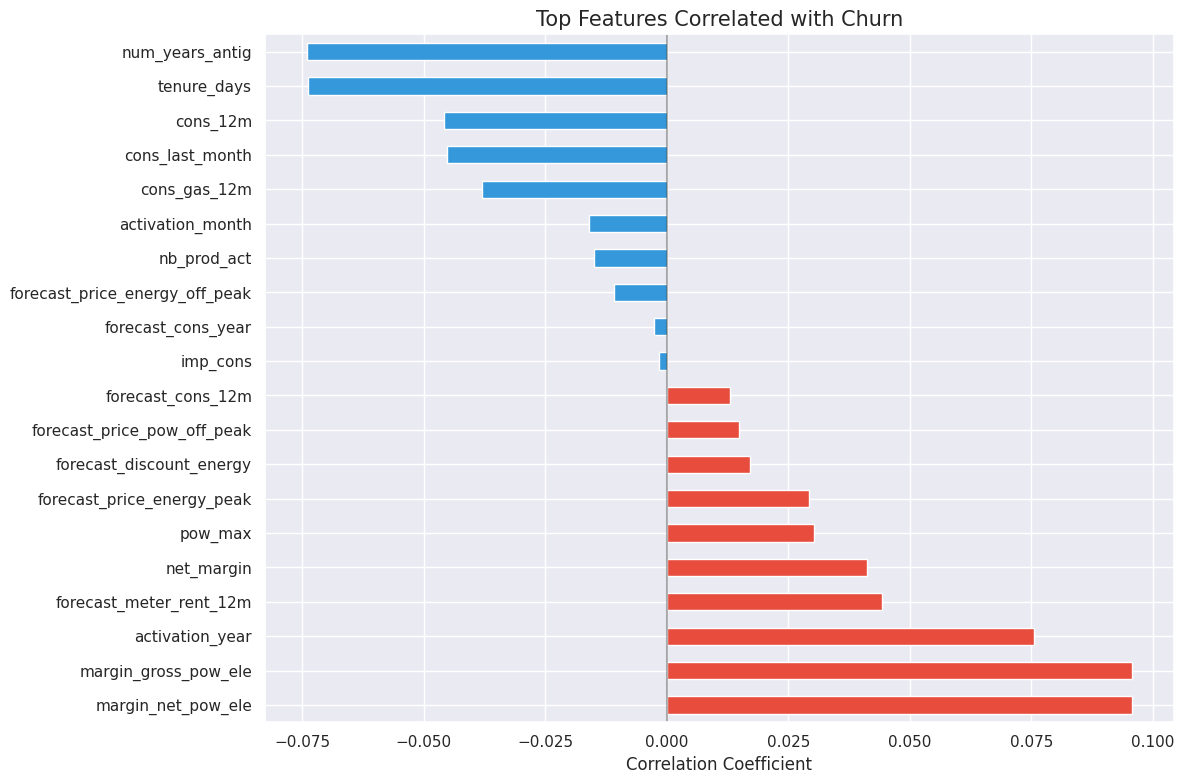


Features most positively correlated with churn:
margin_net_pow_ele         0.095772
margin_gross_pow_ele       0.095725
activation_year            0.075583
forecast_meter_rent_12m    0.044245
net_margin                 0.041135
Name: churn, dtype: float64

Features most negatively correlated with churn:
cons_gas_12m      -0.037957
cons_last_month   -0.045284
cons_12m          -0.045968
tenure_days       -0.073919
num_years_antig   -0.074140
Name: churn, dtype: float64

Insight: The strongest predictors of churn appear to be:
- margin_net_pow_ele: correlation 0.096
- margin_gross_pow_ele: correlation 0.096
- activation_year: correlation 0.076


In [13]:
def analyze_correlations(df):
    """
    Analyze correlations between features and churn.
    """
    print("\n=== Feature Correlation Analysis ===")

    # Select numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

    # Remove ID columns
    numeric_cols = [col for col in numeric_cols if not col.startswith('id')]

    # Ensure churn is in the list if it's numeric
    if 'churn' in df.columns and df['churn'].dtype in [np.int64, np.float64]:
        if 'churn' not in numeric_cols:
            numeric_cols.append('churn')

    # Calculate correlation matrix
    corr_matrix = df[numeric_cols].corr()

    # Plot correlation heatmap
    plt.figure(figsize=(14, 12))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
                linewidths=0.5, vmin=-1, vmax=1)
    plt.title('Correlation Matrix of Numerical Features', fontsize=16)
    plt.tight_layout()
    plt.show()

    # Focus on correlations with churn
    if 'churn' in corr_matrix.columns:
        churn_corr = corr_matrix['churn'].sort_values(ascending=False)

        # Plot top correlations with churn
        plt.figure(figsize=(12, 8))
        top_corr = churn_corr[churn_corr.index != 'churn'].iloc[:10]  # Top 10 positive correlations
        bottom_corr = churn_corr[churn_corr.index != 'churn'].iloc[-10:]  # Top 10 negative correlations

        # Combine for plotting
        plt_corr = pd.concat([top_corr, bottom_corr])

        # Create bar colors based on correlation direction
        colors = ['#e74c3c' if x > 0 else '#3498db' for x in plt_corr]

        # Plot
        plt_corr.plot(kind='barh', color=colors)
        plt.title('Top Features Correlated with Churn', fontsize=15)
        plt.xlabel('Correlation Coefficient', fontsize=12)
        plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
        plt.tight_layout()
        plt.show()

        # Print top positive and negative correlations
        print("\nFeatures most positively correlated with churn:")
        print(churn_corr[churn_corr.index != 'churn'].head(5))

        print("\nFeatures most negatively correlated with churn:")
        print(churn_corr[churn_corr.index != 'churn'].tail(5))

        print("\nInsight: The strongest predictors of churn appear to be:")
        for feature, corr in churn_corr[churn_corr.index != 'churn'].head(3).items():
            print(f"- {feature}: correlation {corr:.3f}")

# Analyze feature correlations
analyze_correlations(client_df)